<a href="https://colab.research.google.com/github/yacineberkani/Formulaire_de_Connexion/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Étude Comparative des Documents avec RAG**
 - Étude Comparative des Documents Utilisant la Technique de RAG avec Knowledge Graph(graphiques de connaissances) et Llama-Index

 https://medium.aiplanet.com/implement-rag-with-knowledge-graph-and-llama-index-6a3370e93cdd

**Introduction**

L'analyse comparative automatique de documents représente l'une des tâches les plus complexes de machine learning , faisant appel à une multitude de techniques variées telles que la reconnaissance d'entités nommées (NER) vers l'extraction de relations (RE). Avec l'avancée de l'IA générative, notamment avec le modèle de langage LLM (Large Language Models), cette approche devient plus accessible en exploitant des techniques telles que le RAG (Génération Augmentée par Récupération), qui améliore les performances des LLM


**RAG (Génération Augmentée par Récupération)**

La RAG consiste à améliorer les performances des LLM en récupérant des morceaux de documents pertinents à partir d'une base de connaissances externe telles que :

**Base de données vectorielles**





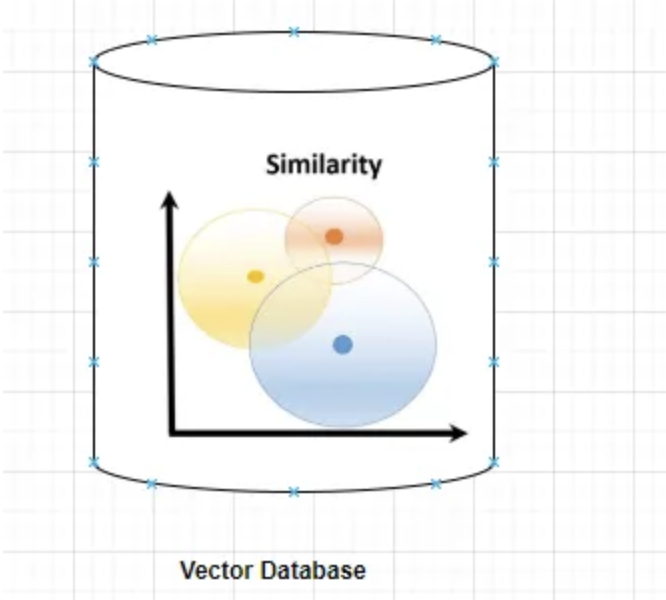

Une base de données vectorielles consiste en une compilation de vecteurs à haute dimension représentant diverses entités ou concepts, comme des mots, des phrases dans un documents. Son utilisation principale réside dans l'évaluation de la similitude ou des liens entre ces entités, basée sur leurs représentations vectorielles




**Graphe de Connaissances (Knowledge Graph)**



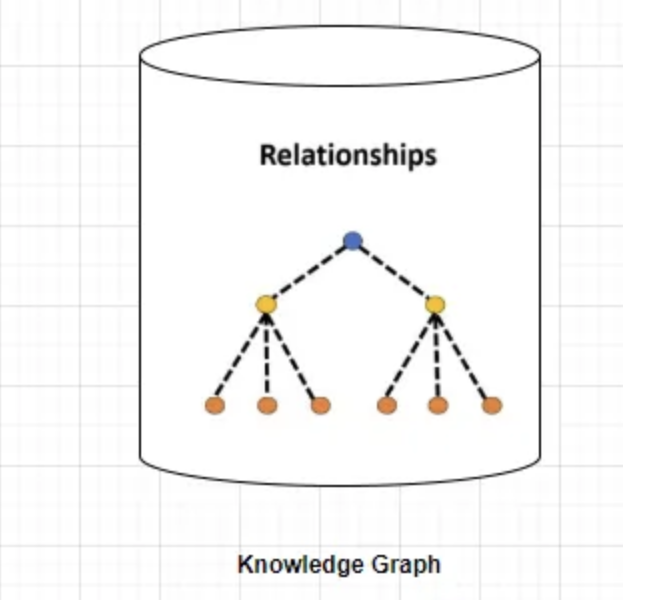

Un graphe de connaissances est une structure composée de nœuds et d'arêtes, symbolisant respectivement des entités ou concepts ainsi que leurs relations, telles que des faits ou des propriétés.

Son utilisation principale consiste à extraire ou déduire des informations factuelles sur diverses entités ou concepts, en se basant sur les attributs associés aux nœuds et aux arêtes

Ces informations récupérées sont ensuite utilisées pour enrichir le contexte de génération du modèle, réduisant ainsi les risques de produire les hallucination (contenus incorrects)

**Pourquoi les graphes de connaissances plutôt que les bases de données vectorielles ?**

- Représentation des relations complexes
- Capacités d'analyse sémantique
- Raisonnement avancé
- Répondre à des requêtes complexes

Notre étude a choisi d'utiliser les graphes de connaissances pour plusieurs raisons.

Ces derniers permettent de capturer les relations complexes entre les entités et offrent des capacités d'analyse sémantique et de raisonnement avancé. Ils sont capables de répondre à des requêtes complexes basées sur des opérateurs logiques et de réaliser une découverte de connaissances approfondie.

Contrairement aux bases de données vectorielles qui se concentrent sur la similitude entre les vecteurs



**Technologies Employées**

**1. LlamaIndex :** est un framework d'orchestration qui simplifie l'intégration de données privées avec des données publiques pour créer des applications à l'aide de grands modèles linguistiques (LLM). Il fournit des outils d'ingestion, d'indexation et d'interrogation de données, ce qui en fait une solution polyvalente pour les besoins d'IA générative.
https://ts.llamaindex.ai/fr/#:~:text=ce%20que%20LlamaIndex.-,TS%3F,ou%20sp%C3%A9cifiques%20%C3%A0%20un%20domaine.







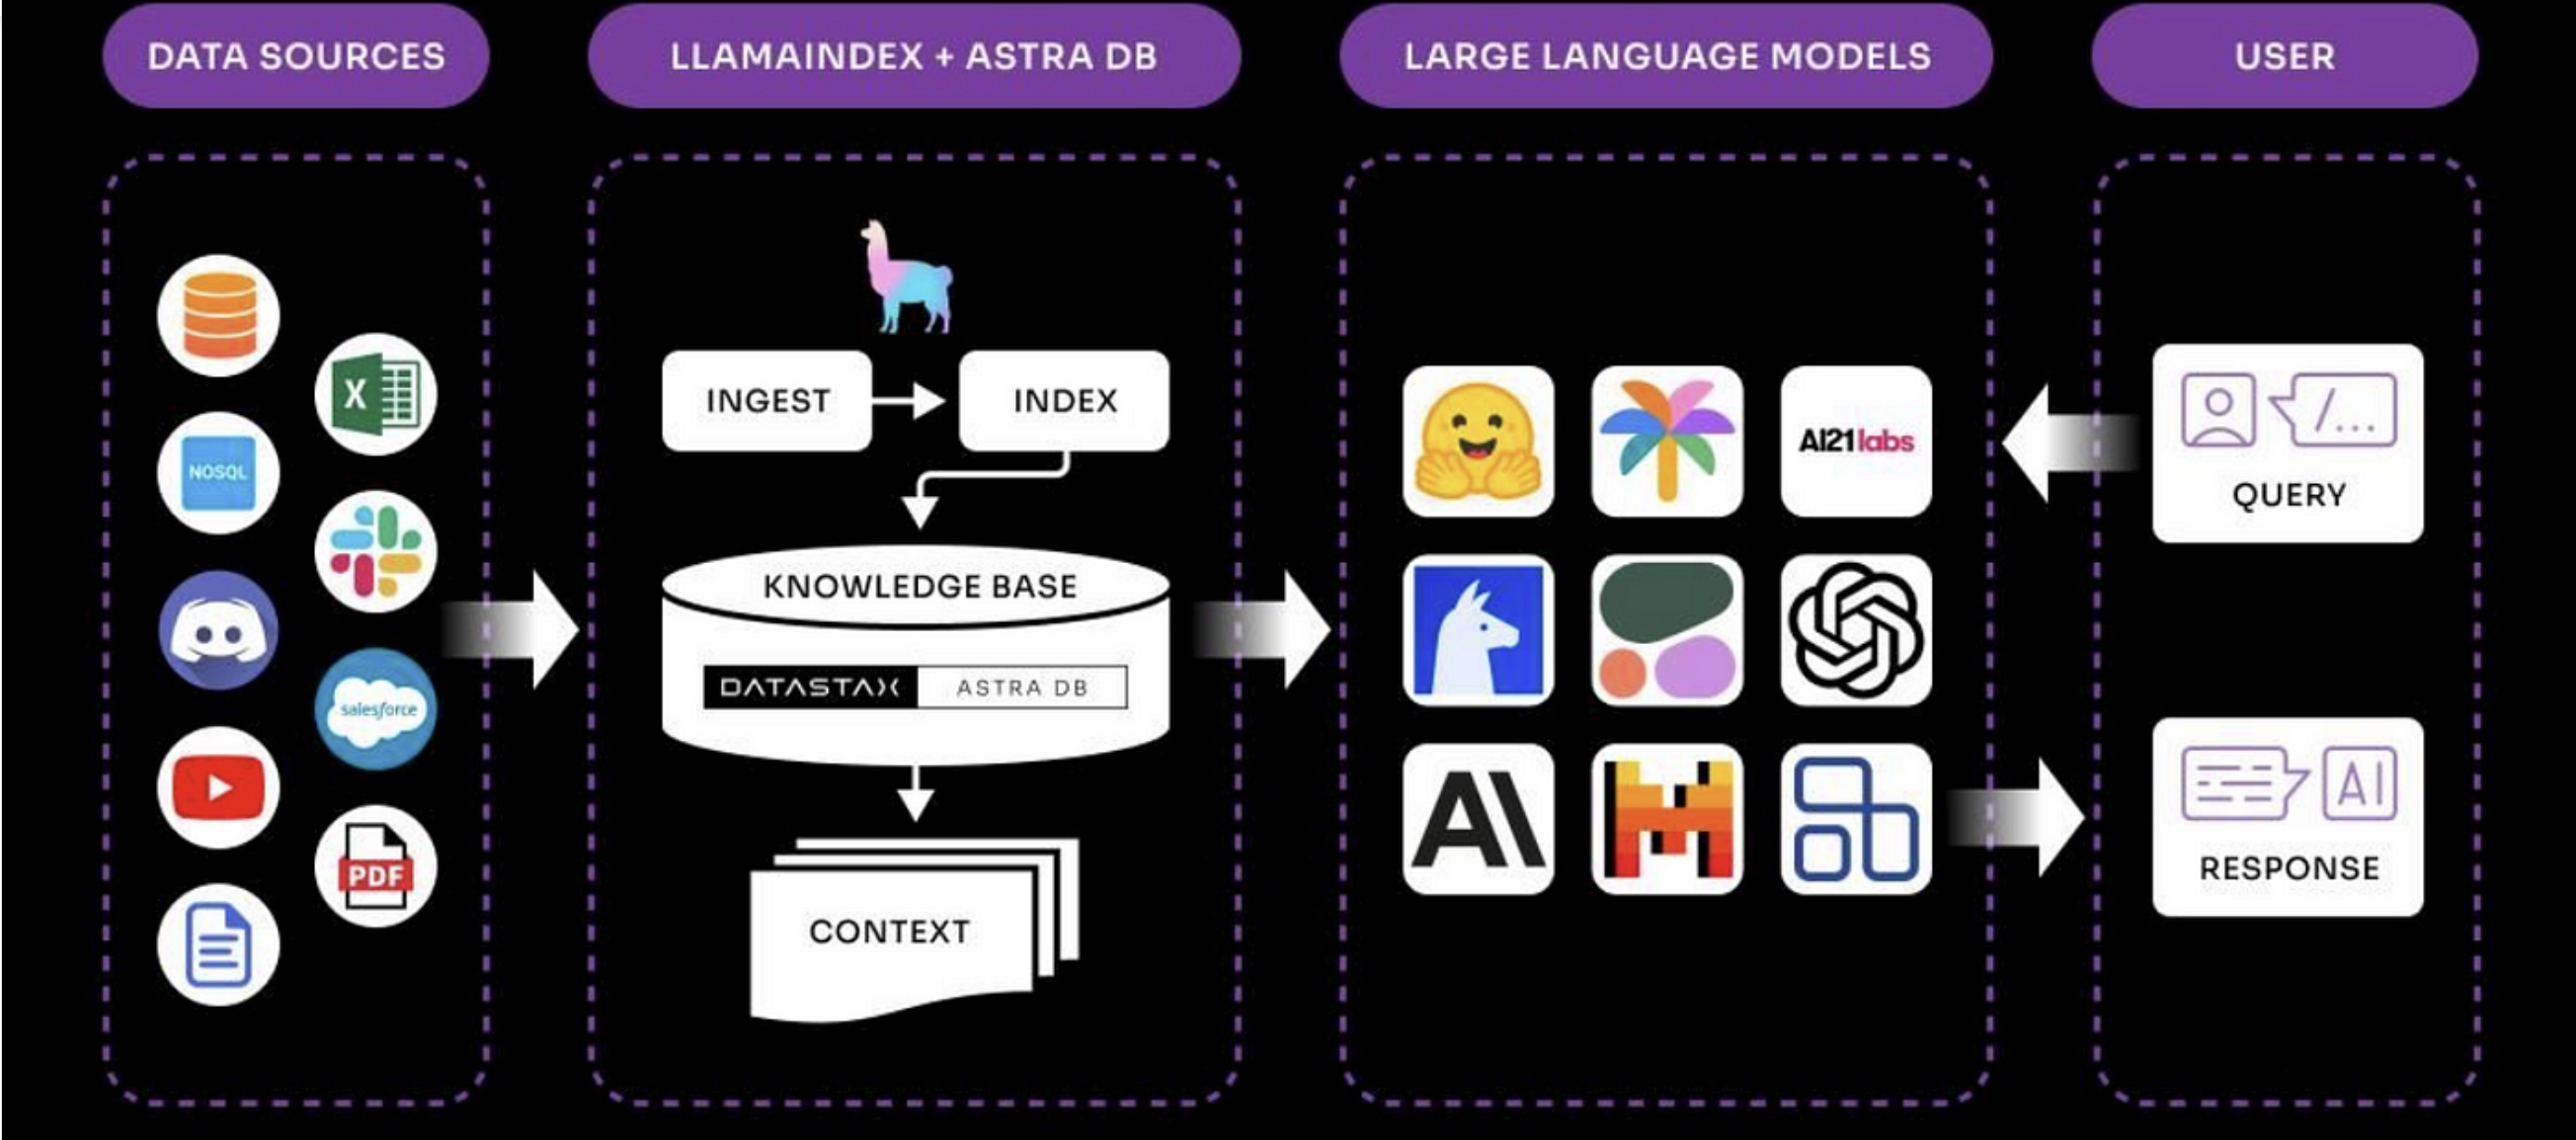

**2. thenlper/gte-large:** le modèle d'intégration est requis pour convertir le texte en représentation numérique d'une information pour le texte fourni. La représentation capture la signification sémantique de ce qui est intégré, ce qui la rend robuste pour de nombreuses applications industrielles
https://huggingface.co/thenlper/gte-large

**3. Llama-3-8B (LLM):** Le modèle Large Language est requis pour générer une réponse basée sur la question et le contexte fournis. Ici, nous avons utilisé le modèle Llama 3 https://github.com/meta-llama/llama3

**Implémentation du code étape par étape :**

Création d'un graphe de connaissances à l'aide de Llama Index .

- 1. Nous allons parcourir un fichier .pdf qui pourrait être transformé en un graphe de connaissances bien structuré

- 2. Stockez les intégrations dans un référentiel de données graphiques.

- 3. Récupérer le contexte pertinent correspondant à la requête de l'utilisateur

- 4. Fournir la réponse au LLM pour générer une réponse



# Installer les dépendances requises

In [ ]:
!pip install llama_index pyvis Ipython langchain pypdf
!pip install llama-index-llms-huggingface
!pip install llama-index-embeddings-langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

# Importer les dépendances requises

In [ ]:
import logging
import sys
#
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [ ]:
from llama_index.core import SimpleDirectoryReader # pour lire des données non structurées.
# ServiceContext : fournit des données contextuelles vitales pour orchestrer divers services. Il a été obsolète et remplacé par Paramètres.
from llama_index.core import KnowledgeGraphIndex # requis pour la construction et la manipulation de Knowledge Graphs.
from llama_index.core import Settings
from llama_index.core.graph_stores import SimpleGraphStore #sert de référentiel simple pour stocker les données graphiques.
from llama_index.core import StorageContext
from llama_index.llms.huggingface import HuggingFaceInferenceAPI # Modèle pour exploiter les LLM Open-Source.
from langchain.embeddings import HuggingFaceEmbeddings, HuggingFaceInferenceAPIEmbeddings
from llama_index.embeddings.langchain import LangchainEmbedding
from pyvis.network import Network

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:160: UserWarning: Field "model_id" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


**Mettre en place le LLM**

nous avons utilisé les points de terminaison de l'API d'inférence Huggingfac

In [ ]:
# Définition de la clé d'API Huggingface
HF_TOKEN = "*********"  # Clé d'API Huggingface

# Création de l'API Huggingface pour l'inférence
llm = HuggingFaceInferenceAPI(
    model_name="meta-llama/Meta-Llama-3-8B-Instruct",  # Nom du modèle utilisé
    token=HF_TOKEN  # Clé d'API pour l'authentification
)


**Configurer le modèle d'intégration**

In [ ]:
# Création du modèle d'intégration
embed_model = LangchainEmbedding(
    HuggingFaceInferenceAPIEmbeddings(
        api_key=HF_TOKEN,  # Clé d'API Huggingface pour l'authentification
        model_name="thenlper/gte-large"  # Nom du modèle pour les intégrations
    )
)


**Charger les données**. Ici, j'ai utilisé deux fichiers PDF pour faire une étude comparative.
- https://github.com/yacineberkani/test/blob/main/Rapport_Projet.pdf
- https://github.com/yacineberkani/test/blob/main/ProjetNLP_BERKANI-Yacine_ELBIDI-Louai.pdf

In [ ]:
# Création d'un lecteur de répertoire simple pour charger les données depuis "/content"
doc = SimpleDirectoryReader(
    input_dir="/content",  # Répertoire d'entrée pour les fichiers
    required_exts=[".pdf", ".docx"]  # Extensions de fichiers requises
)

# Chargement des données à partir du répertoire spécifié
documents = doc.load_data()

# Affichage du nombre de page total des documents chargés
print(len(documents))

# Affichage des documents chargés
print(documents)


20
[Document(id_='a2177cc5-2720-4db0-8f8b-b3624f934158', embedding=None, metadata={'page_label': '1', 'file_name': 'ProjetNLP_BERKANI-Yacine_ELBIDI-Louai.pdf', 'file_path': '/content/ProjetNLP_BERKANI-Yacine_ELBIDI-Louai.pdf', 'file_type': 'application/pdf', 'file_size': 138846, 'creation_date': '2024-05-12', 'last_modified_date': '2024-05-12'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='Classification de tweets bas´ ee sur le transfer learning\nBerkani Yacine\nELBIDI Louai\nApril 19, 2024\nIntroduction\nCe projet s’inscrit dans le cadre de l’apprentissage profond appliqu´ e au traitement automatique du langage naturel,\nplus pr´ ecis´ ement ` a la classification de tweets selon leur intensit´ e sentimentale. L’objectif est de d´ evelopper un\nsyst`

**Construire l'index du Graphe de Connaissances (Knowledge Graph)**

In [ ]:
# Configurer le contexte de service (paramètre global de LLM)
Settings.llm = llm  # Définition du modèle de langage pour le contexte de service
Settings.chunk_size = 512  # Définition de la taille de chunk pour le traitement des données

# Configurer le contexte de stockage
graph_store = SimpleGraphStore()  # Création d'une instance de stockage de graphique simple
storage_context = StorageContext.from_defaults(graph_store=graph_store)  # Configuration du contexte de stockage par défaut

# Construire le Knowledge Graph Index
index = KnowledgeGraphIndex.from_documents(
    documents=documents,  # Les documents à indexer
    max_triplets_per_chunk=3,  # Le nombre de triplets de relation traités par bloc de données
    storage_context=storage_context,  # Contexte de stockage pour l'index
    embed_model=embed_model,  # Modèle d'intégration pour la représentation numérique
    include_embeddings=True  # Inclure les intégrations dans l'index
)



**Triplet dans un Graphe de Connaissances (Knowledge Graph)**

Un triplet est une unité de données de base dans le graphique. Il se compose de trois parties :

- Sujet : le nœud auquel le triplet est associé.

- Objet : le nœud vers lequel la relation pointe.

- Prédicat : la relation qui relie le sujet à l'objet.

Pour illustrer cela avec un exemple plus concret, considérons le triplet suivant :

Sujet : "Paris"

Prédicat : "est la capitale de"

Objet : "France"

Ce triplet représente la relation où ("Paris")--[est la capitale de] ---> ("France").




**Knowledge Graph (Graphe de Connaissances) créé à partir du document.**

In [ ]:
from pyvis.network import Network
from IPython.display import display
g = index.get_networkx_graph()
net = Network(notebook=True,cdn_resources="in_line",directed=True)
net.from_nx(g)
net.show("graph.html")
net.save_graph("Knowledge_graph.html")
#
import IPython
IPython.display.HTML(filename="/content/Knowledge_graph.html")

graph.html


# **questions 1** comparer les deux documents ?


In [ ]:
# Définition de la requête
query = "comparer les deux documents ? "

# Configuration du moteur de requêtes
query_engine = index.as_query_engine(
    include_text=True,  # Inclure le texte dans les résultats de la requête
    response_mode="tree_summarize",  # Mode de réponse pour résumer les résultats
    embedding_mode="hybrid",  # Mode d'intégration pour la comparaison de similarité
    similarity_top_k=5,  # Nombre maximum de réponses à retourner
)

# Modèle de message pour la requête
message_template = f"""Veuillez vérifier si les éléments de contexte suivants contiennent une mention des mots-clés fournis dans la question. Si ce n'est pas le cas, ne connaissez pas la réponse, indiquez simplement que vous ne savez pas. Arrêtez-vous là. S'il vous plaît, ne faites pas d'effort pour inventer une réponse.
</s>
Question : {query}
Please provide a complete response in French.
Réponse utile :
</s>"""

# Requête au moteur de recherche
response = query_engine.query(message_template)

# Affichage de la réponse
print(response.response.split("<|assistant|>")[-1].strip())


Les deux documents sont des rapports de projet, mais ils ont des thèmes et des objectifs différents. Le Rapport Projet est un rapport de projet de détection de tumeurs cérébrales par IRM, tandis que le Projet NLP est un rapport de projet de classification de tweets selon leur intensité sentimentale. Les deux rapports utilisent des modèles de machine learning, mais les modèles et les techniques utilisées sont différentes. Le Rapport Projet compare les performances de trois modèles (Random Forest, VGG16 et CNN) pour la détection de tumeurs cérébrales, tandis que le Projet NLP utilise un modèle de transfer learning pour la classification de tweets. Les deux rapports ont des conclusions différentes, mais ils montrent tous deux l'efficacité des modèles de machine learning pour résoudre des problèmes spécifiques. En résumé, les deux documents sont des rapports de projet distincts qui abordent des thèmes et des objectifs différents. </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s


In [ ]:
# Définition de la requête
query = "comparer les auteurs, les dates et les titres des deux documents ?"
# Configuration du moteur de requêtes
query_engine = index.as_query_engine(
    include_text=True,  # Inclure le texte dans les résultats de la requête
    response_mode="tree_summarize",  # Mode de réponse pour résumer les résultats
    embedding_mode="hybrid",  # Mode d'intégration pour la comparaison de similarité
    similarity_top_k=5,  # Nombre maximum de réponses à retourner
)

# Modèle de message pour la requête
message_template = f"""Veuillez vérifier si les éléments de contexte suivants contiennent une mention des mots-clés fournis dans la question. Si ce n'est pas le cas, ne connaissez pas la réponse, indiquez simplement que vous ne savez pas. Arrêtez-vous là. S'il vous plaît, ne faites pas d'effort pour inventer une réponse.
</s>
Question : {query}
Please provide a complete response in French.
Réponse utile :
</s>"""

# Requête au moteur de recherche
response = query_engine.query(message_template)

# Affichage de la réponse
print(response.response.split("<|assistant|>")[-1].strip())


Oui, les éléments de contexte contiennent des mentions des mots-clés fournis dans la question. Voici les résultats de la comparaison :

* Auteurs : 
	+ Rapport Projet : BERKANI Yacine
	+ Projet NLP : BERKANI Yacine et ELBIDI Louai
* Dates : 
	+ Rapport Projet : 09 décembre 2023
	+ Projet NLP : Pas de date mentionnée
* Titres : 
	+ Rapport Projet : Rapport de Projet
	+ Projet NLP : Projet NLP BERKANI-Yacine_ELBIDI-Louai

Il est important de noter que les informations ne sont pas exhaustives, car les documents ne contiennent pas toutes les informations demandées. Cependant, les éléments de contexte contiennent des mentions des mots-clés fournis dans la question. </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s>  </s


# ***questions 2*** sur le document ./*Rapport_Projet*.pdf"

In [ ]:
query = "Que présente le document de rapport de projet ?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a complete response in French.
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

Le document de rapport de projet présente un projet de détection de tumeurs cérébrales par IRM, réalisé par Berkani Yacine. Il décrit la méthodologie utilisée, les résultats obtenus et les conclusions tirées. Il mentionne également les performances des modèles Random Forest, VGG16 et CNN utilisés pour la détection de tumeurs cérébrales. </s>
---------------------
page_label: 1
file_path: /content/Rapport_Projet.pdf

Rapport de Projet
Projet de :
Détection de Tumeurs Cérébrales par IRM
Réalisé par :
BERKANI Yacine
09 décembre 2023

page_label: 2
file_path: /content/Rapport_Projet.pdf

Plan
Introduction 3
1 Introduction 3
2 Problématique 3
3 Origine des Données 4
Méthodologie 5
4 Augmentation de données 5
5 Modèle Random Forest 5
6 Modèle VGG16 6
7 Modèle CNN 8
Comparaison des Modèlesn 10
8 Comparaison 10


In [ ]:
query = "comparer les deux modèles VGG16 et CNN utilisé dans le rapport de projet ?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a complete response in French.
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

Oui, le rapport de projet mentionne la comparaison des deux modèles VGG16 et CNN. En effet, dans le chapitre 8, il est écrit : "En fonction de ces résultats, le modèle VGG16 semble offrir la meilleure performance globale avec une précision de 97%. Cependant, le modèle CNN présente un compromis intéressant entre performance et complexité, avec une précision de 95%." De plus, dans le chapitre 4.2, il est expliqué que le modèle VGG16 a été entraîné avec une couche Dense supplémentaire pour l'adaptation à la tâche spécifique de détection de tumeurs cérébrales, tandis que le modèle CNN a été entraîné avec une architecture séquentielle. Enfin, dans le chapitre 11, il est mentionné que le modèle VGG16 nécessite plus de ressources pour l'entraînement et l'inférence que le modèle CNN. </s>


In [ ]:
query = "Quelles sont les forces et les faiblesses de chaque modèle utilisé dans le rapport de projet ?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a complete response in French.
Useful and well structured answer please:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

Dans le rapport de projet, les forces et les faiblesses de chaque modèle utilisé sont mentionnées comme suit :

* Le modèle VGG16 est considéré comme le modèle le plus performant avec une précision de 97%. Cependant, il nécessite plus de ressources pour l'entraînement et l'inférence.
* Le modèle CNN est plus léger que VGG16, ce qui peut partiellement réduire le risque de surajustement. Cependant, il est légèrement moins précis que VGG16.
* Le modèle Random Forest est moins performant que les deux autres modèles avec une précision de 86%. Cependant, il peut être considéré dans des scénarios où la complexité informatique est une contrainte majeure.

Il est important de noter que ces forces et faiblesses sont évaluées en fonction des besoins spécifiques du projet et des contraintes de ressources. </s>


In [ ]:
query = "qui est berkani yacine?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a complete response in French.
Useful answer is short:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

BERKANI Yacine est l'auteur du projet de détection de tumeurs cérébrales par IRM. Il est mentionné dans le rapport de projet. </s>


In [ ]:
query = "quelle est la date de naissance de berkani yacine ?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a complete response in French.
Useful answer is short:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

Je ne sais pas. La date de naissance de Berkani Yacine n'est pas mentionnée dans les extraits de texte fournis. </s>


# **questions 3** sur le document ./ProjetNLP_BERKANI-Yacine_ELBIDI-Louai.pdf

In [ ]:
query = "Que présente le document Projet NLP ?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a complete response in French.
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

Le document Projet NLP présente les résultats d'un projet de classification de sentiments dans les tweets, en utilisant un modèle de réseaux de neurones. Il décrit l'entraînement et l'évaluation du modèle, ainsi que les résultats obtenus. Il montre également comment le modèle a été adapté pour classer les sentiments dans sept catégories différentes.


In [ ]:
query = "qu'elle est l'objectif de projet NLP ?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a complete response in French.
Helpful Answer:
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

L'objectif du projet NLP est d'évaluer l'efficacité d'un modèle à classifier correctement les sentiments exprimés dans les tweets.


In [ ]:
query = "quelle sont les auteur de projet NLP ?"
query_engine = index.as_query_engine(include_text=True,
                                     response_mode ="tree_summarize",
                                     embedding_mode="hybrid",
                                     similarity_top_k=5,)
#
message_template =f"""<|system|>Please check if the following pieces of context has any mention of the  keywords provided in the Question.If not then don't know the answer, just say that you don't know.Stop there.Please donot try to make up an answer.</s>
<|user|>
Question: {query}
Please provide a short answer in French.
The short answer.
</s>"""
#
response = query_engine.query(message_template)
#
print(response.response.split("<|assistant|>")[-1].strip())

BERKANI-Yacine et ELBIDI-Louai sont les auteurs du projet NLP. </s>
